# Retail Sales Forecasting

This notebook aims to predict weekly sales using regression models (Linear Regression and XGBoost), with proper feature engineering and visualization.


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data
train = pd.read_csv("trainw.csv")
test = pd.read_csv("testw.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")


In [3]:
# Merge datasets
train = pd.merge(train, features, on=["Store", "Date", "IsHoliday"], how="left")
train = pd.merge(train, stores, on="Store", how="left")

test = pd.merge(test, features, on=["Store", "Date", "IsHoliday"], how="left")
test = pd.merge(test, stores, on="Store", how="left")

#Feature Engineering
# Convert Date column to datetime
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Feature Engineering - extract date parts
for df in [train, test]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Week"] = df["Date"].dt.isocalendar().week
    df["Day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["IsMonthStart"] = df["Date"].dt.is_month_start.astype(int)
    df["IsMonthEnd"] = df["Date"].dt.is_month_end.astype(int)

train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Year,Month,Week,Day,DayOfWeek,IsMonthStart,IsMonthEnd
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,5,4,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,8.106,A,151315,2010,2,6,12,4,0,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,8.106,A,151315,2010,2,7,19,4,0,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,8.106,A,151315,2010,2,8,26,4,0,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,8.106,A,151315,2010,3,9,5,4,0,0


In [4]:
# Convert Date column
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Extract time features
for df in [train, test]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Week"] = df["Date"].dt.isocalendar().week
    df["Day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["IsMonthStart"] = df["Date"].dt.is_month_start.astype(int)
    df["IsMonthEnd"] = df["Date"].dt.is_month_end.astype(int)


In [5]:
#Preprocessing for Modeling
#Drop rows with missing target
train = train.dropna(subset=["Weekly_Sales"])

#Fill missing values in the features
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

#Select features and target
features_list = ["Store", "Dept", "Size", "Temperature", "Fuel_Price", "CPI",
                 "Unemployment", "IsHoliday", "MarkDown1", "MarkDown2",
                 "MarkDown3", "MarkDown4", "MarkDown5", "Year", "Month", 
                 "Week", "Day", "DayOfWeek", "IsMonthStart", "IsMonthEnd"]

X = train[features_list]
y = train["Weekly_Sales"]


In [6]:
#Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 21797.2734251727


In [8]:
#XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 6885.405367170564


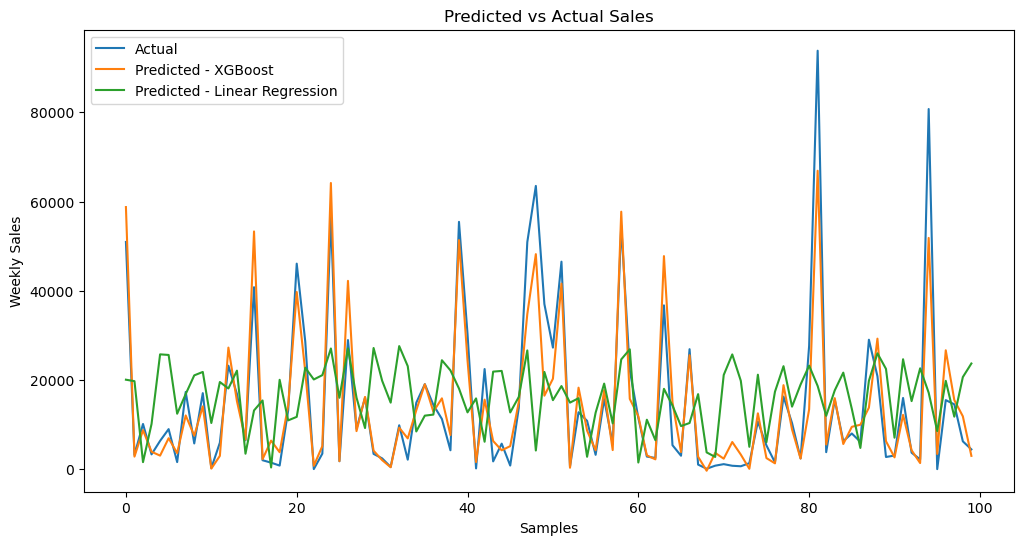

In [9]:
#Visualization: Predicted vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_val.values[:100], label='Actual')
plt.plot(y_pred_xgb[:100], label='Predicted - XGBoost')
plt.plot(y_pred_lr[:100], label='Predicted - Linear Regression')
plt.legend()
plt.title("Predicted vs Actual Sales")
plt.xlabel("Samples")
plt.ylabel("Weekly Sales")
plt.show()


## Interpretation:

- Lower RMSE indicates a better fit. XGBoost performs better than Linear Regression.
- XGBoost captures complex relationships in sales patterns.
- Feature importance from XGBoost can guide business strategy (e.g., promotions, markdown impact).

